In [1]:
# libraries

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import patoolib

# settings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [2]:
# Extracting zip files of bird images, I have chosen three different flycatchers for the homework assignment
#import zipfile

#with zipfile.ZipFile('AcadianFlycatcher.zip', 'r') as zip_ref:
#    zip_ref.extractall()
    
#with zipfile.ZipFile('ScissorTailedFlycatcher.zip', 'r') as zip_ref:
#    zip_ref.extractall()

#with zipfile.ZipFile('VermilionFlycatcher.zip', 'r') as zip_ref:
#    zip_ref.extractall()

In [3]:
# reading images

acadian = cv2.imread('AcadianFlycatcher/Acadian_Flycatcher_0059_29102.jpg')
scissorTailed = cv2.imread('ScissorTailedFlycatcher/Scissor_Tailed_Flycatcher_0119_41879.jpg')
vermillion = cv2.imread('VermilionFlycatcher/Vermilion_Flycatcher_0024_42506.jpg')

#cv2.imwrite('image0.png', acadianGrey)
#cv2.imwrite('image1.png', scissorTailed)
#cv2.imwrite('image2.png', vermillion)

# Task 4

## Write a code to read color images and display their RGB channel images

In [4]:
# Function that displays RGB channels

def rgbBird(bird):

    b = bird.copy()
# set green and red channels to 0
    b[:, :, 0] = 0
    b[:, :, 1] = 0


    g = bird.copy()
# set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = bird.copy()
# set blue and green channels to 0
    r[:, :, 2] = 0
    r[:, :, 1] = 0


    f, axarr = plt.subplots(1,4)
    
    axarr[0].imshow(bird)
    axarr[0].axis("off")
    axarr[0].set_title("All Channels")
   
    axarr[1].imshow(r)
    axarr[1].axis("off")
    axarr[1].set_title("Red Channel")

    axarr[2].imshow(g)
    axarr[2].axis("off")
    axarr[2].set_title("Green Channel")

    axarr[3].imshow(b)
    axarr[3].axis("off")
    axarr[3].set_title("Blue Channel")

    
    plt.show()


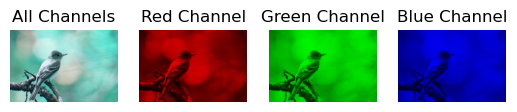

In [5]:
rgbBird(acadian)

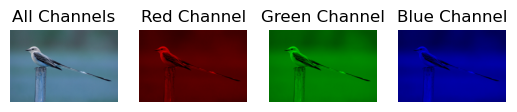

In [6]:
rgbBird(scissorTailed)

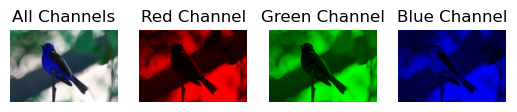

In [7]:
rgbBird(vermillion)

# Task 
####  Convert these color images to grayscale and dispaly them while printing their dimensions

The dimensions of this image are 333x500


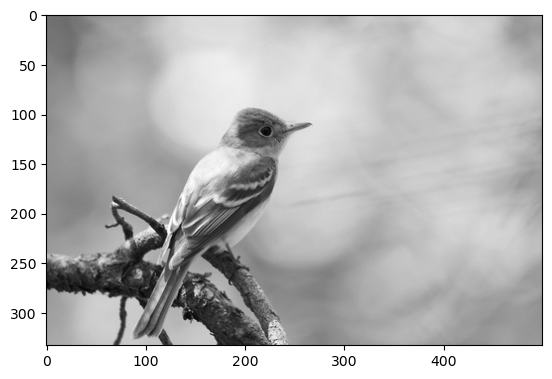

In [8]:
acadianGrey = cv2.cvtColor(acadian, cv2.COLOR_BGR2GRAY)
acadianHeight, acadianWidth = acadianGrey.shape

plt.imshow(acadianGrey, cmap=plt.get_cmap('gray'))
print('The dimensions of this image are ' + str(acadianHeight) + 'x' + str(acadianWidth))


#cv2.imwrite('bird.png', acadianGrey)

# Task 5

#### Write a function to reduce the grayscale images such that the output of dimesnions are divisible by sixteen without changing their original aspect ratio  significantly

In [9]:
def ResizeBird(BirdImage):
    height, width = BirdImage.shape
    
    newHeight = 256
    newWidth = width // 16 # Divides the width of the image by sixteen without the remainder
    
    newImage = cv2.resize(BirdImage, dsize = (newWidth*16, newHeight), interpolation = cv2.INTER_CUBIC)
    
    return newImage

In [10]:
acadianGrey = ResizeBird(acadianGrey)

The dimensions of this image are 256x496


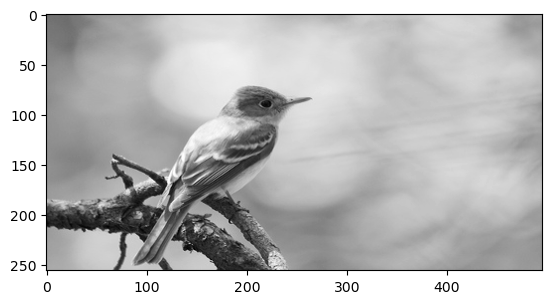

In [11]:
acadianHeight, acadianWidth = acadianGrey.shape

plt.imshow(acadianGrey, cmap=plt.get_cmap('gray'))
print('The dimensions of this image are ' + str(acadianHeight) + 'x' + str(acadianWidth))

# Task 6 - Generate Block Features
#### Write a code to divide each image into blocks of 16x16 pixels and transform them to vectors of size 256.  I decided to modify my greyscale image function to include the flattening process

In [12]:
# Block feature function, input an unprocessed bird image and the flattened block array gets returned.
# steps include:
    # greyscaling image
    # resizing image to height = 256, width is the nearest divisible by 16 number
    # flattens image into blocks
    # combines flat arrays into a dataframe
flatArray = []

def FlatArray(BirdImage):  # input the greyscale bird image as parameter
    
    greyBird = cv2.cvtColor(BirdImage, cv2.COLOR_BGR2GRAY) 
    height, width = greyBird.shape
    #print("Grey step complete")
        
    newHeight = 256
    newWidth = width // 16 # Divides the width of the image by sixteen without the remainder
    
    newImage = cv2.resize(greyBird, dsize = (newWidth*16, newHeight), interpolation = cv2.INTER_CUBIC)
    
    #print("resize Complete")

    h = 0
    
    # flattening Image
    
    flatArray = [] # used to store flattened block arrays
    h = 0  # Used to track pixels
    w = 0
   
    for x in range(16): # This loop slides the box horizontally, stepping by 16.  Start:1, Stop, 256, Step: 16  
        for y in range(newWidth): # ERROR 3 # this loop slides the 16x16 block horizontally across the image, a                                        # and records data as it goes
            #print(h, w)
            blockArray = greyBird[h:h+16, w:w+16].flatten()
            #print(blockArray.shape)
            flatArray.append(blockArray) 
            w+=16
        w=0  # reseting width counter
        h +=16
            
    #flatArray = np.vstack(flatArray)
    df = pd.DataFrame(flatArray)    
    return df


In [29]:
# Creating block features for each bird
acadianDF = FlatArray(acadian)
vermillionDF = FlatArray(vermillion)
scissorTailedDF = FlatArray(scissorTailed)

# assigning labels for each bird
acadianDF['label'] = 0                 # Acadian Flycatcher =  0
vermillionDF['label']  = 1             # Vermillion Flycatcher =  1
scissorTailedDF['label']  = 2          # ScissorTailed Flycatcher =  2

# concatenating frames together into two files for task 9 - image012 and image 01
image012 = pd.concat([acadianDF, vermillionDF, scissorTailedDF], ignore_index=True, axis=0)
image01 = pd.concat([acadianDF, vermillionDF], ignore_index=True, axis=0)

# turning those frames into csv's

image012.to_csv('image012.csv', index=False)  
image01.to_csv('image01.csv', index=False)  

image012.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,label
0,114,114,114,113,113,115,116,116,114,114,114,114,114,113,112,112,114,115,115,115,114,114,114,113,114,114,114,114,113,113,113,113,114,115,116,115,115,115,115,114,113,114,115,114,113,113,114,114,115,115,115,114,114,115,116,116,114,115,115,115,114,113,113,114,115,115,114,113,113,114,114,114,114,114,115,115,114,113,113,112,114,115,115,114,114,115,115,114,113,114,114,114,114,113,112,111,114,115,116,116,116,116,115,115,113,113,113,113,113,113,112,112,116,116,116,115,114,114,113,113,112,113,114,113,112,112,113,114,116,118,117,115,114,115,115,113,115,113,114,115,114,114,114,113,116,117,117,116,116,117,116,115,115,113,114,115,114,114,114,114,116,116,116,116,116,116,117,117,115,114,114,115,114,114,115,114,117,116,116,117,117,116,116,117,115,115,115,115,114,114,115,115,118,117,117,118,118,117,117,118,116,116,116,116,114,114,116,115,118,117,117,118,118,117,117,118,117,117,117,116,115,115,116,115,118,117,117,118,118,117,117,118,118,117,117,116,115,116,116,114,119,119,119,119,118,118,118,118,118,117,117,116,115,116,116,113,0
1,114,113,112,114,115,114,115,119,119,120,122,122,121,122,123,125,114,113,112,112,113,113,113,116,118,119,120,120,120,121,122,124,114,113,112,112,113,113,114,116,118,118,119,119,120,121,121,122,114,114,113,112,113,114,115,117,117,118,119,120,120,120,121,122,114,114,113,111,112,112,113,115,117,119,120,121,120,120,121,122,113,113,112,112,113,112,113,115,116,118,120,121,120,120,121,122,112,112,111,112,113,112,112,115,115,117,119,120,120,120,121,122,113,112,111,112,113,110,110,113,115,116,118,120,121,121,121,121,112,112,112,111,110,110,112,114,114,116,119,120,120,119,120,121,115,114,113,112,111,111,112,113,115,117,119,120,120,120,121,122,114,113,111,111,112,112,112,113,115,116,119,120,120,120,121,122,114,112,111,111,112,112,113,113,114,116,118,119,120,121,122,122,116,114,113,113,112,112,112,113,114,116,118,119,120,121,122,123,114,114,114,113,112,112,112,113,114,115,117,119,120,121,122,122,113,113,113,113,112,112,112,114,114,115,116,118,119,120,121,121,115,114,114,113,113,112,112,113,114,115,117,119,120,120,121,121,0
2,126,128,130,132,136,137,138,139,140,140,141,143,144,144,144,145,125,126,128,130,133,135,137,140,142,142,142,143,144,143,143,144,123,125,126,128,131,132,135,139,141,141,142,144,144,144,144,145,122,124,125,127,130,131,133,136,139,140,142,144,145,145,145,146,122,123,124,126,129,130,131,133,137,139,141,143,144,145,145,145,122,123,122,124,127,129,130,132,134,136,139,141,143,144,146,146,121,122,122,124,126,127,128,131,131,133,136,137,139,142,145,146,121,122,124,125,126,126,126,128,132,133,134,134,136,139,142,144,122,122,124,125,125,125,126,128,130,131,132,133,135,137,139,141,123,123,123,123,124,124,127,129,128,129,131,133,134,135,137,138,123,122,122,123,123,124,126,128,128,129,129,129,130,133,136,138,122,122,123,124,125,125,125,126,128,128,127,127,129,132,135,138,123,122,123,124,125,125,125,126,125,126,128,129,131,133,135,136,124,123,123,123,124,124,126,127,126,127,128,130,131,133,135,137,123,123,123,124,124,124,125,127,128,128,129,129,131,134,137,139,122,122,124,125,124,124,125,126,128,129,130,132,133,135,137,1

<Axes: >

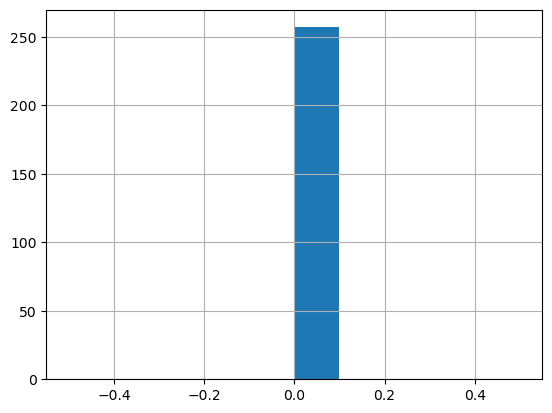

In [14]:
naArray = image012.isna().sum()

naArray.hist()

In [15]:
image012.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,label
1483,134,136,137,137,137,138,137,135,136,136,136,137,137,137,136,135,136,136,137,137,137,136,136,136,137,136,136,136,136,137,137,136,138,136,136,138,138,136,136,138,136,136,136,136,136,137,137,136,137,136,137,138,138,137,137,138,135,135,136,137,137,137,136,135,136,137,138,137,138,138,138,137,136,136,136,136,137,137,136,136,136,138,138,137,137,138,137,135,138,137,136,135,135,136,137,138,137,137,137,137,137,137,136,135,139,138,136,136,136,136,137,137,137,136,136,137,137,135,135,137,138,138,138,138,138,137,136,135,136,137,136,134,135,138,139,138,136,136,136,136,136,136,136,136,136,136,136,136,136,137,137,137,135,135,135,136,136,136,136,136,136,135,136,137,137,136,136,136,137,137,136,136,136,136,135,134,136,135,136,138,137,135,135,137,139,138,136,136,136,136,135,134,137,136,136,137,137,135,135,137,137,136,136,136,137,138,137,137,137,136,136,136,136,136,136,137,137,136,136,136,137,137,137,137,136,136,136,135,136,137,137,136,138,137,136,136,135,135,135,135,135,136,136,135,135,137,137,136,136,135,135,135,135,135,135,136,2
1484,136,135,134,134,134,134,134,133,133,133,134,134,135,135,135,134,136,136,135,135,135,135,134,134,136,134,133,133,134,135,135,135,136,136,136,136,135,135,134,134,136,134,133,132,133,134,134,134,136,135,135,135,135,134,134,134,133,134,134,134,135,134,133,132,136,135,135,134,134,134,134,135,132,134,135,136,135,134,133,133,136,136,136,135,134,135,135,136,134,135,136,136,135,134,134,135,136,136,136,136,135,135,135,136,136,136,135,135,135,135,134,134,135,135,136,136,135,135,135,135,136,135,134,134,135,135,133,131,135,136,135,133,134,136,135,133,134,134,134,135,136,136,135,134,134,135,135,133,134,135,135,134,134,134,135,135,135,135,134,134,135,136,136,134,134,135,136,135,134,135,135,135,134,134,134,135,135,136,136,135,135,135,136,135,135,136,135,135,134,134,134,135,134,135,135,135,134,134,135,135,136,135,134,134,134,134,134,134,135,135,135,135,135,135,135,135,136,134,133,133,133,134,134,133,136,136,135,136,136,136,135,135,135,135,134,134,134,134,134,134,136,135,135,136,136,135,135,135,135,136,136,135,134,134,135,135,2
1485,132,133,133,132,133,133,133,132,132,131,131,131,131,130,129,130,133,134,133,132,132,133,133,132,133,132,132,132,132,131,130,131,134,135,134,133,132,133,133,133,134,132,131,131,131,131,130,130,135,135,135,134,133,133,133,133,133,131,130,130,131,131,131,131,133,134,134,134,134,134,133,132,132,132,131,131,131,132,131,130,132,133,133,133,134,134,133,131,132,132,131,131,131,131,131,129,133,133,133,133,134,134,133,131,131,132,132,131,131,131,130,129,135,134,133,133,135,135,134,132,130,132,133,133,132,133,132,130,134,133,133,134,135,135,134,132,134,133,132,132,131,131,131,130,134,133,133,133,134,134,133,132,133,133,132,132,132,131,131,131,134,133,133,133,134,134,133,132,132,132,132,132,132,132,131,131,134,134,134,134,133,133,133,133,132,132,133,133,132,131,131,131,134,134,134,134,133,133,133,134,132,132,133,133,132,131,131,131,134,134,134,133,133,133,133,133,132,133,133,133,132,131,131,131,134,134,133,133,133,133,133,132,132,133,133,133,132,131,132,133,134,134,134,134,134,134,133,133,132,133,133,133,132,

In [16]:
print(acadianDF.shape)
print(vermillionDF.shape)
print(scissorTailedDF.shape)

print(image01.shape)
print(image012.shape)

acadianDF.to_csv('image0.csv', index=False)  
vermillionDF.to_csv('image1.csv', index=False)  
scissorTailedDF.to_csv('image2.csv', index=False)  


(496, 257)
(496, 257)
(496, 257)
(992, 257)
(1488, 257)


# Task 7 - Sliding block array

In [17]:
# Debugged code

def SlidingBlock(BirdImage):  # input the greyscale bird image as parameter
    
    BirdImage = cv2.cvtColor(BirdImage, cv2.COLOR_BGR2GRAY) #ERROR 1 - this was missing
    height, width = BirdImage.shape
    #print("I am here")
    # newHeight = 256
    # newWidth = width // 16 # Divides the width of the image by sixteen without the remainder
    
    # newImage = cv2.resize(BirdImage, dsize = (newWidth*16, newHeight), interpolation = cv2.INTER_CUBIC)
    
    # flattening Image
    flatArray = [] # used to store flattened block arrays
    for h in range(height-16): #ERROR 2 # this loop slides the 16x16 block down one row, before it goes into the horizontal loop      
        for w in range(width-16): # ERROR 3 # this loop slides the 16x16 block horizontally across the image, a                                        # and records data as it goes
            #print(h, w)
            blockArray = BirdImage[h:h+16, w:w+16].flatten()
            flatArray.append(blockArray)        
    #print("I am here 2")
    flatArray = np.vstack(flatArray)
    df = pd.DataFrame(flatArray)    
    return df



In [18]:
image0_SlidingBlock = SlidingBlock(acadian)
image1_SlidingBlock = SlidingBlock(vermillion)
image2_SlidingBlock = SlidingBlock(scissorTailed)

image0_SlidingBlock.to_csv('image0_SlidingBlock.csv', index=False)  
image1_SlidingBlock.to_csv('image1_SlidingBlock.csv', index=False)  
image2_SlidingBlock.to_csv('image2_SlidingBlock.csv', index=False)  


# Task 8 - Derive statistical descriptors

In [19]:
# Descriptive statistics by label

image0DescriptiveStats = acadianDF.describe()
image1DescriptiveStats = vermillionDF.describe()
image2DescriptiveStats = scissorTailedDF.describe()

image0DescriptiveStats.to_csv('image0DescriptiveStats.csv', index=False)  
image1DescriptiveStats.to_csv('image1DescriptiveStats.csv', index=False)  
image2DescriptiveStats.to_csv('image2DescriptiveStats.csv', index=False)  


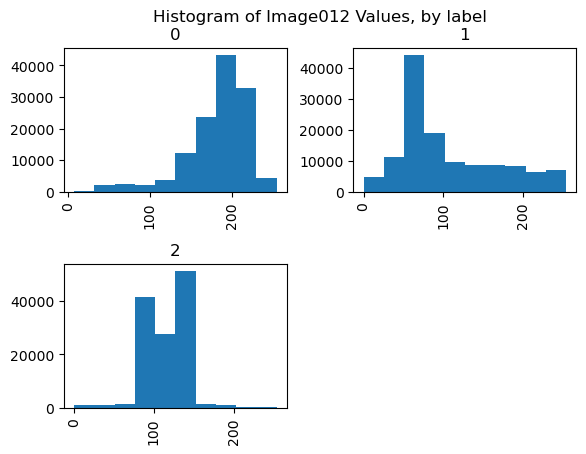

In [20]:
dfPlot = pd.melt(image012, id_vars = 'label')
dfPlot = dfPlot.rename(columns={'variable':'Block Feature Array'})



dfPlot.hist(['value'],  
         by='label') 
title_boxplot = 'Histogram of Image012 Values, by label'
plt.suptitle(title_boxplot) # that's what you're after
plt.show()

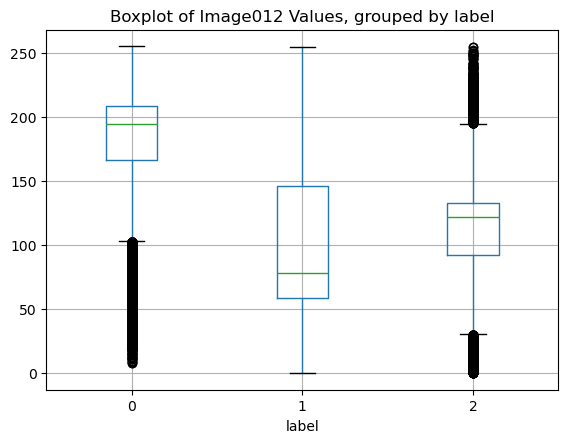

In [21]:
dfPlot.boxplot('value',  
         by='label') 
title_boxplot = 'Boxplot of Image012 Values, grouped by label'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()


<Axes: title={'center': 'Scatterplot of Image012'}, xlabel='value', ylabel='Block Feature Array'>

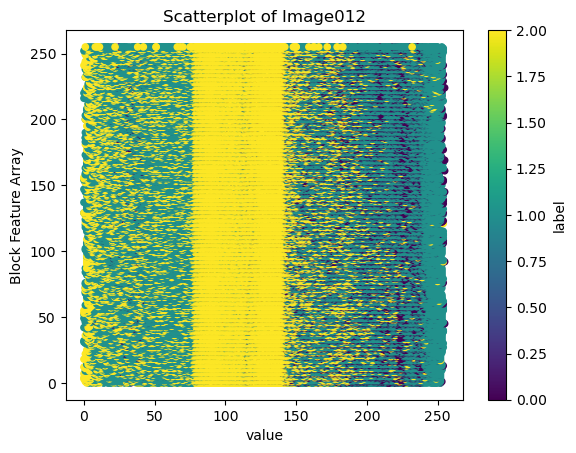

In [22]:
dfPlot.plot.scatter(x='value', y='Block Feature Array', c='label', colormap='viridis', title = "Scatterplot of Image012")


# Task 9 Construct a feature space

### Creating combined datafiles was done previously in code
### Randomizing combined datafiles is below

In [23]:
image012RAND = image012.sample(frac=1)
image01RAND = image01.sample(frac=1)

image012RAND.to_csv('image012RAND.csv', index=False)  
image01RAND.to_csv('image01RAND.csv', index=False)  


In [24]:
image012RAND

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,label
656,53,52,52,53,53,52,52,52,52,54,50,51,51,48,50,51,53,53,53,53,53,52,52,52,51,53,50,51,51,49,50,50,52,51,51,51,52,51,51,51,51,52,50,51,52,49,49,49,51,50,50,50,51,51,51,52,51,52,51,51,52,50,49,49,51,50,50,51,51,51,52,52,51,51,51,50,51,50,49,50,51,50,50,50,50,50,50,51,51,50,51,49,50,50,49,52,50,49,49,49,49,49,49,49,50,49,51,50,50,51,50,54,50,49,49,49,49,49,49,50,49,49,52,50,51,52,51,56,50,49,49,49,50,51,51,50,52,51,52,51,51,53,54,56,49,48,48,49,49,48,48,49,47,47,50,51,52,54,54,55,50,49,48,49,48,47,47,49,51,50,52,52,53,56,57,59,51,49,48,49,49,47,47,50,52,51,53,52,53,56,58,61,51,48,47,49,49,48,48,50,50,50,53,54,55,58,59,62,51,48,47,48,49,49,50,51,53,53,56,56,57,60,62,65,51,49,48,48,49,50,51,52,55,55,57,56,57,60,62,66,50,49,49,48,48,49,51,52,53,54,58,59,60,63,64,67,1
1286,138,138,137,137,137,138,138,138,137,139,140,138,138,139,139,137,138,138,137,137,138,138,138,138,139,137,137,138,138,137,137,139,138,138,137,137,138,138,138,137,139,137,136,138,138,137,137,139,138,138,138,138,138,138,138,137,138,139,139,137,137,139,139,137,138,138,138,138,139,138,138,137,137,139,139,137,138,140,139,137,139,138,138,138,139,139,138,138,139,137,137,139,140,138,137,138,139,138,138,138,138,139,139,138,139,137,137,139,140,139,138,139,139,138,137,137,138,138,139,139,139,140,139,138,139,141,141,138,137,138,137,136,136,138,139,138,139,138,138,138,138,138,138,138,139,138,137,137,138,139,140,140,138,138,137,137,138,138,138,138,139,138,136,137,137,137,138,138,138,138,137,137,137,137,138,138,139,137,136,136,137,136,135,136,138,138,138,138,137,137,137,138,137,136,136,137,137,137,136,136,137,138,138,138,138,138,138,138,134,135,136,136,137,138,138,137,136,137,138,138,138,138,138,139,134,136,137,135,135,137,137,136,136,137,138,138,137,137,137,138,136,139,139,135,133,135,136,134,136,137,138,138,136,135,135,136,2
1433,131,133,133,134,138,109,94,85,97,133,130,151,154,150,156,140,135,135,132,133,137,113,104,108,116,134,129,145,126,125,129,140,133,134,133,136,136,111,99,112,96,107,115,127,120,141,133,143,134,134,133,133,137,109,98,113,103,101,92,141,159,147,148,150,136,135,136,132,140,105,94,104,103,108,98,130,155,152,152,153,135,134,136,133,139,97,90,96,102,118,108,135,151,151,156,161,136,134,132,132,133,93,98,110,121,123,135,144,152,154,144,149,134,135,132,139,133,89,98,114,131,122,143,149,160,155,151,147,136,135,133,135,138,99,102,119,125,125,143,145,153,159,161,150,132,133,134,134,132,95,104,120,123,128,154,158,155,160,162,145,133,133,134,134,129,93,105,119,119,127,148,156,157,161,158,147,135,135,133,133,133,95,106,121,121,126,144,158,157,160,158,150,134,136,131,134,136,94,105,125,124,124,151,167,152,155,161,143,132,136,132,135,132,87,101,123,123,130,152,162,153,155,158,138,133,134,133,136,127,84,104,121,120,135,149,155,162,156,154,146,135,131,132,139,128,91,114,123,114,128,147,158,164,149,150,150,2
1239,121,120,119,119,119,118,117,116,116,116,116,115,115,116,116,116,120,119,118,118,119,119,119,118,118,119,119,117,116,116,116,117,122,122,121,121,120,120,120,120,119,120,120,119,117,116,116,116,121,121,121,120,120,119,118,118,118,119,120,119,118,118,117,117,120,12

# Task 10: Display Subspaces



<Axes: title={'center': 'Scatterplot of Image012, features 86 & 11'}, xlabel='11', ylabel='86'>

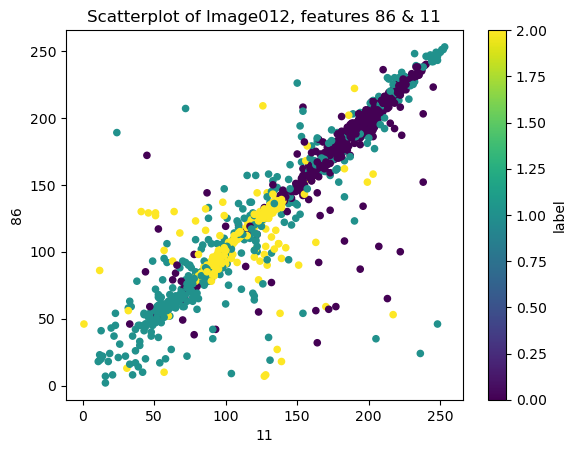

In [25]:
image012RAND.plot.scatter(x=11, y=86, c='label', colormap='viridis', title = "Scatterplot of Image012, features 86 & 11")


<Axes: title={'center': 'Scatterplot of Image01, features 86 & 11'}, xlabel='11', ylabel='86'>

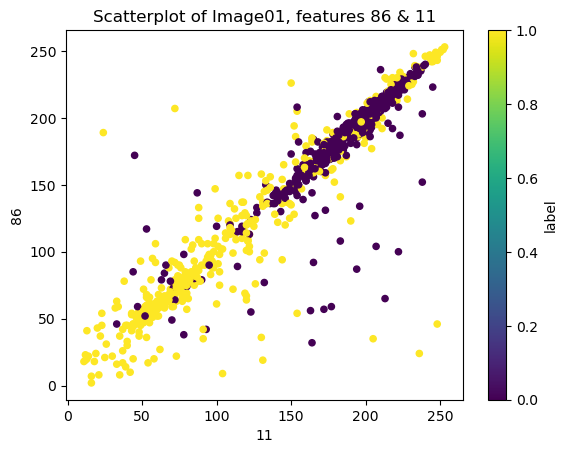

In [26]:
image01RAND.plot.scatter(x=11, y=86, c='label', colormap='viridis', title = "Scatterplot of Image01, features 86 & 11")


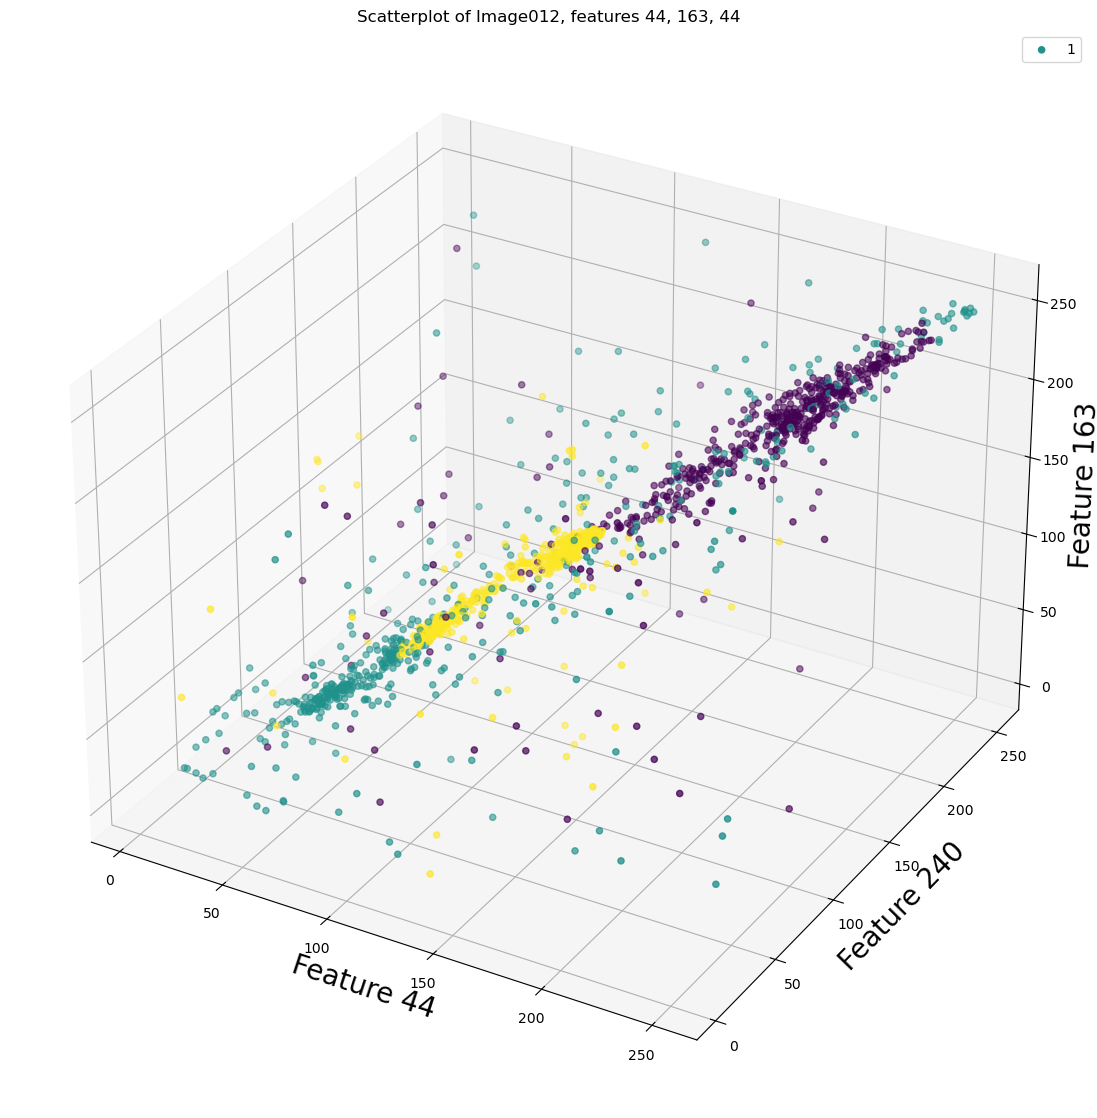

In [27]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(projection='3d')


ax.scatter(image012RAND[44], image012RAND[240], image012RAND[163], 
           c=image012RAND['label'], cmap = 'viridis')
ax.legend(image012RAND['label'])
plt.title('Scatterplot of Image012, features 44, 163, 44')
ax.set_xlabel('Feature 44', fontsize="20")
ax.set_ylabel('Feature 240', fontsize="20")
ax.set_zlabel('Feature 163', fontsize="20")


plt.show()

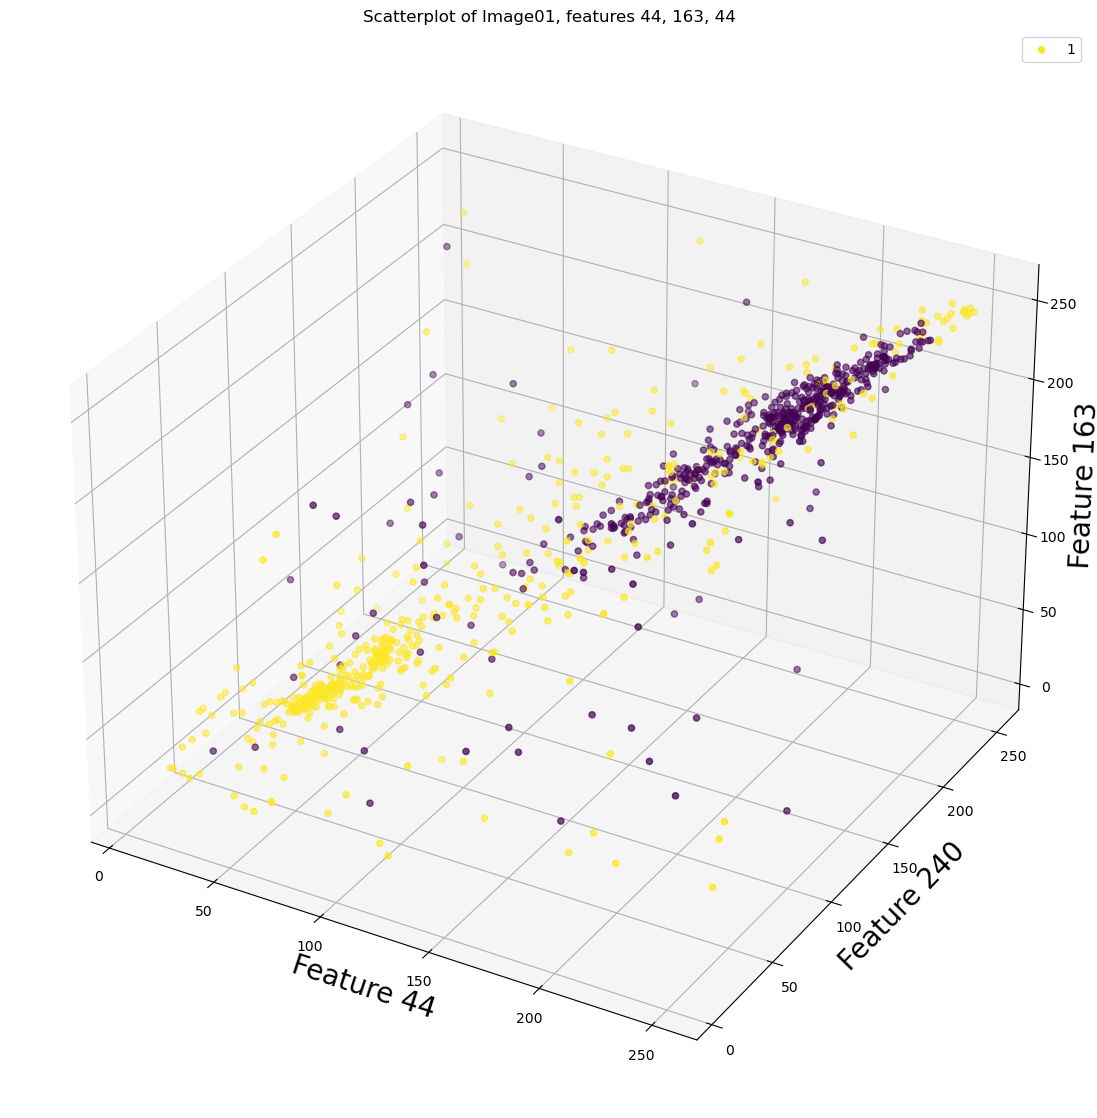

In [28]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(projection='3d')


ax.scatter(image01RAND[44], image01RAND[240], image01RAND[163], 
           c=image01RAND['label'], cmap = 'viridis')
ax.legend(image01RAND['label'])
plt.title('Scatterplot of Image01, features 44, 163, 44')
ax.set_xlabel('Feature 44', fontsize="20")
ax.set_ylabel('Feature 240', fontsize="20")
ax.set_zlabel('Feature 163', fontsize="20")


plt.show()